In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [4]:
def mape(y_true, y_pred):
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n*100
    return mape

In [9]:
df = pd.read_csv('line_1002.csv')
train = df.loc[:,['holidays', 'Hour', 'Month', 'Temperature', 'humiduity', 'Wind_speed']]
target = df["Power"]
print(train.head)
print(target.head)
x_train,x_test,y_train,y_test = train_test_split(train,target,test_size=0.01305,random_state=42)

mm = MinMaxScaler()
ss = StandardScaler()
X_train = mm.fit_transform(x_train)
X_test = mm.transform(x_test)
print(X_train[:1])
print(target[20:30])

<bound method NDFrame.head of        holidays  Hour  Month  Temperature  humiduity  Wind_speed
0             0   0.0      7        11.80       93.0        14.4
1             0   0.5      7        11.80       91.0        14.4
2             0   1.0      7        11.80       89.0        18.0
3             0   1.5      7        11.60       91.0        18.0
4             0   2.0      7        11.40       93.0        10.8
...         ...   ...    ...          ...        ...         ...
25723         1  21.5     12         5.55       87.5         7.2
25724         1  22.0     12         5.60       86.0        10.8
25725         1  22.5     12         5.60       85.0        10.8
25726         1  23.0     12         5.60       84.0        10.8
25727         1  23.5     12         5.60       84.0        10.8

[25728 rows x 6 columns]>
<bound method NDFrame.head of 0        0.362
1        0.064
2        0.119
3        0.023
4        0.140
         ...  
25723    0.084
25724    0.116
25725    0.14

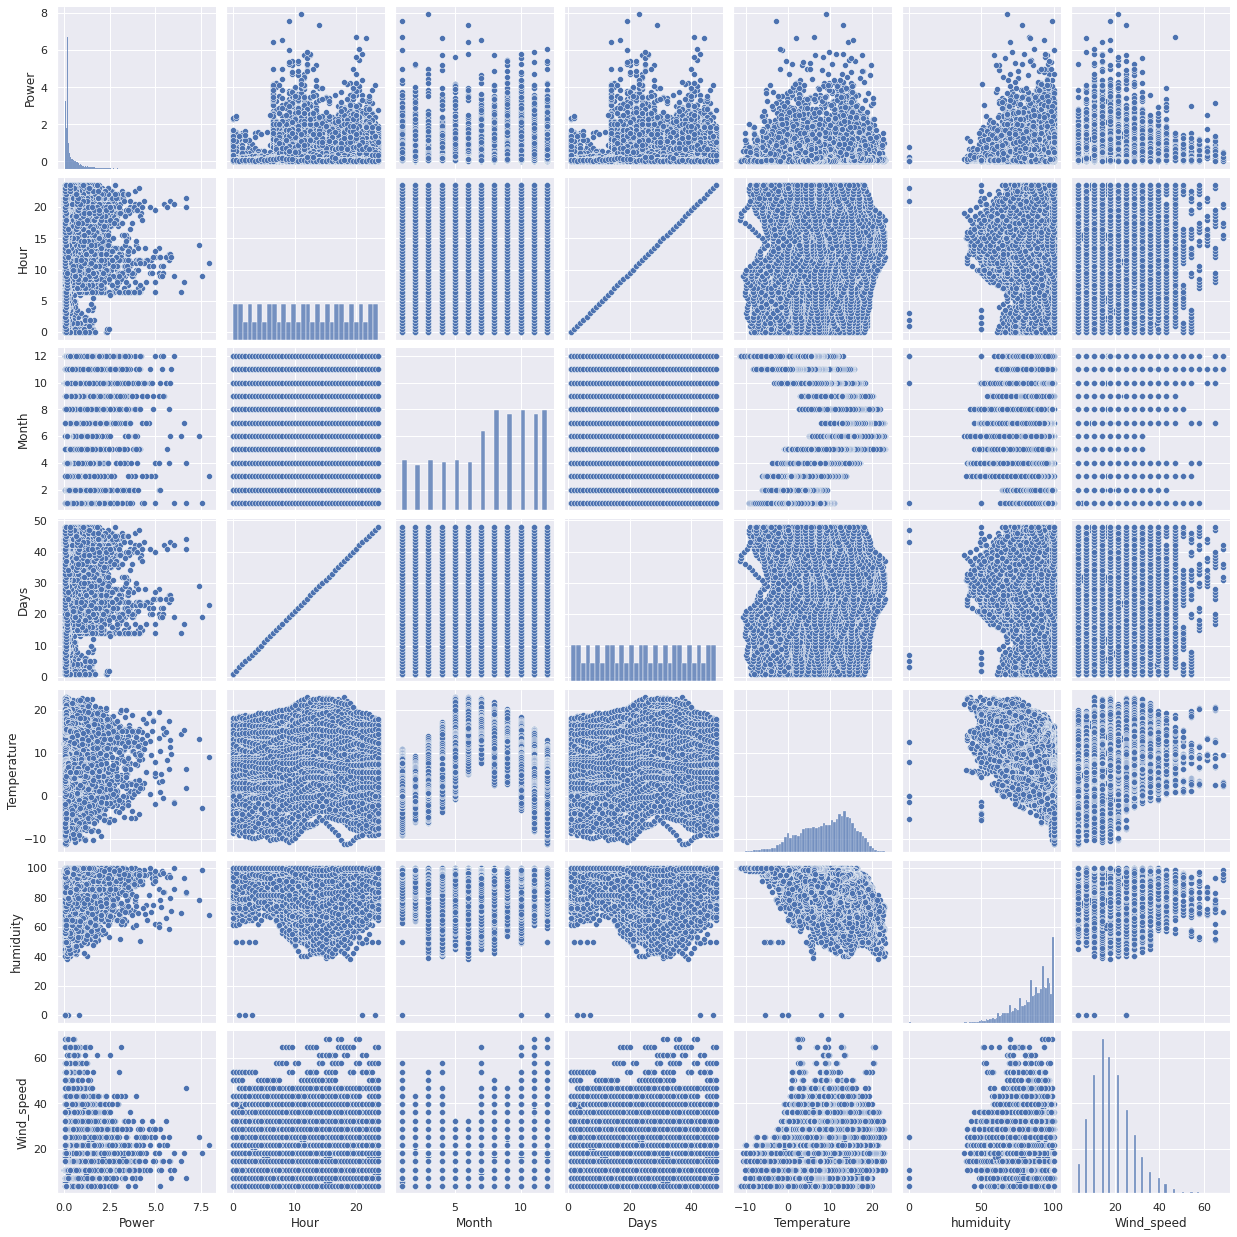

In [6]:
df = df.loc[:,['Power', 'Hour', 'Month', 'Days', 'Temperature', 'humiduity', 'Wind_speed']]
sns.pairplot(df)

<AxesSubplot:>

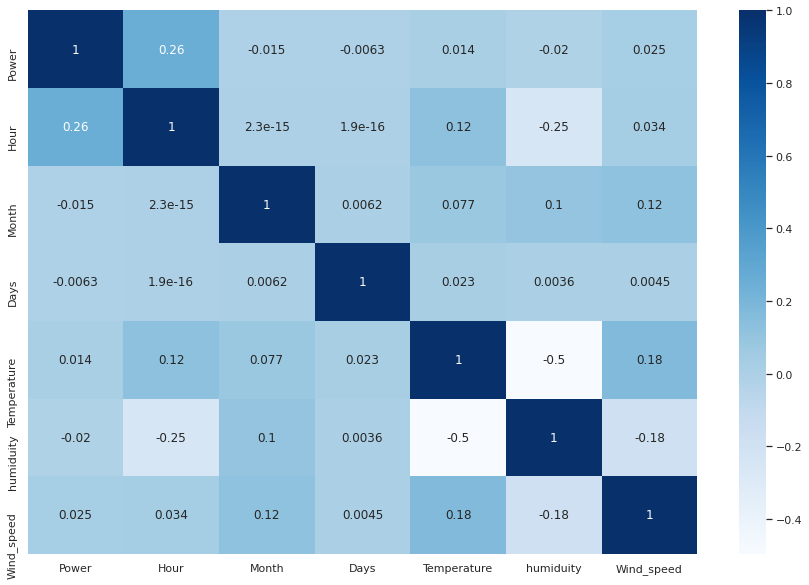

In [5]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='Blues',annot=True)

In [8]:
from sklearn.model_selection import RandomizedSearchCV
param_distribs= {
    "C": np.arange(1, 2000).tolist(),
    "gamma": np.arange(1,500).tolist(),
}
RS_SVR =RandomizedSearchCV(SVR(kernel='rbf'),param_distribs, refit=True, cv=5, verbose=1, n_jobs=15)
RS_SVR.fit(X_train, y_train)
pd.DataFrame(RS_SVR.cv_results_)
print('score:', RS_SVR.best_score_)
print(RS_SVR.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
score: -0.1421460628646371
{'gamma': 480, 'C': 1013}


Test RMSE: 0.146
Test MAE: 0.101
Test MAPE: 129.755


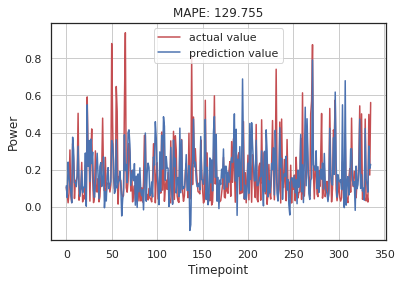

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rbf_svr = SVR(kernel = 'rbf', gamma=14, C=632)
#rbf_svr = SVR(kernel = 'rbf', gamma=298, C=1510)
rbf_svr.fit(X_train, y_train)
rbf_svr_y_pred = rbf_svr.predict(X_test)


mae = metrics.mean_absolute_error(y_test, rbf_svr_y_pred)
MAPE = mape(y_test,rbf_svr_y_pred)
rmse = sqrt(mean_squared_error(y_test,rbf_svr_y_pred))
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
print('Test MAPE: %.3f' % MAPE)

plt.plot(range(len(y_test)), y_test, c='r', label='actual value')
plt.plot(range(len(rbf_svr_y_pred)), rbf_svr_y_pred, c='b', label='prediction value')
plt.grid(True)
plt.legend()
plt.title('MAPE: %.3f' % MAPE)
plt.xlabel('Timepoint')
plt.ylabel('Power')
plt.show()


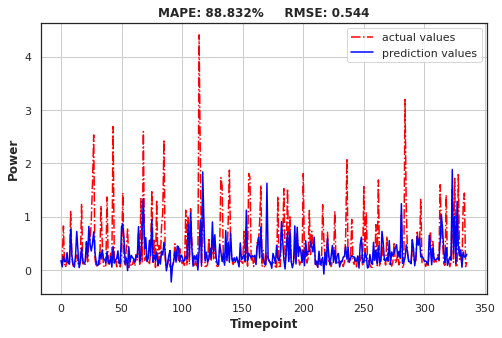

In [8]:
sns.set_style('white')
font1 = {
        'weight':'bold',
        'size':12,}
plt.figure(figsize=(8, 5))
plt.plot(range(len(y_test)), y_test, ls='-.', c='red', label='actual values')
plt.plot(range(len(rbf_svr_y_pred)), rbf_svr_y_pred, ls='-', c='blue', label='prediction values')
plt.grid(True)
plt.legend()
plt.title('MAPE: %.3f%%' % MAPE + '     ' + 'RMSE: %.3f' % rmse, font1)
plt.xlabel('Timepoint', font1)
plt.ylabel('Power', font1)
plt.savefig('SVR_line_1990')
plt.show()

